# Introduction to Regression with Neural Network in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# Create some data to view and fit

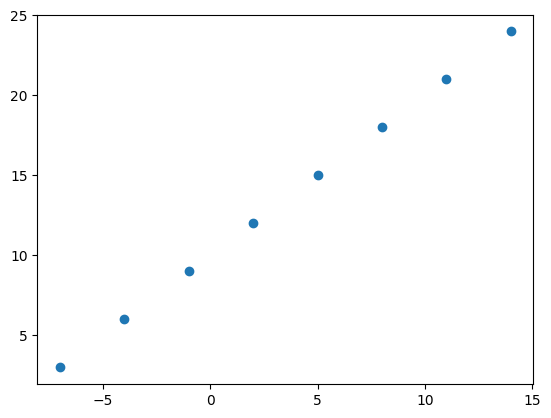

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays into Tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

# Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).
4. **Evaluating a model** - use a model's predictions to evaluate its performance.

In [7]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [8]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 828ms/step - loss: 16.2682 - mae: 16.2682
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 15.9870 - mae: 15.9870
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 15.7057 - mae: 15.7057
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 15.4245 - mae: 15.4245
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 15.1432 - mae: 15.1432


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 82ms/step


array([[-6.892404]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 236ms/step - loss: 15.2255 - mae: 15.2255
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 14.9591 - mae: 14.9591
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 14.8266 - mae: 14.8266
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 14.6941 - mae: 14.6941
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 14.5616 - mae: 14.5616
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 14.4291 - mae: 14.4291
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 14.2966 - mae: 14.2966
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 14.1641 - mae: 14.1641
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 14.0316 - mae: 14.0316
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.8991 - mae: 13.8991
Epoch 11/100
1/1 [==============================] - 0s 7m

In [12]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 55ms/step


array([[29.476553]], dtype=float32)

# Experimenting 1 to improve our model

In [14]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 13.8955 - mae: 13.8955
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4554 - mae: 13.4554
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.0189 - mae: 13.0189
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.5851 - mae: 12.5851
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.1525 - mae: 12.1525
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 11.7204 - mae: 11.7204
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2883 - mae: 11.2883
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8559 - mae: 10.8559
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4226 - mae: 10.4226
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9877 - mae: 9.9877
Epoch 11/100
1/1 [==============================] - 0s 5ms/

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[27.41536]], dtype=float32)

## Evaluate our model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize."

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels).

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [17]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

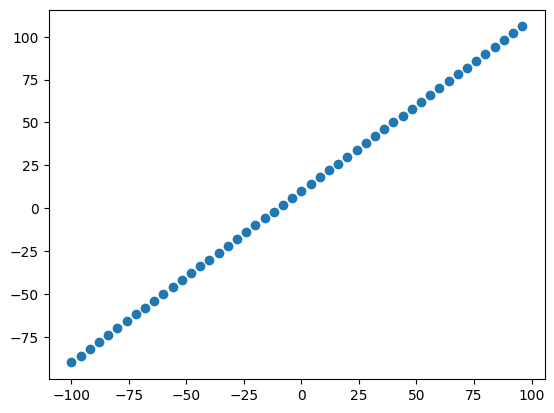

In [18]:
# Visualize the data
plt.scatter(X, y);

# The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the **total data** you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the **total data** you have available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the **total data** you have available.

In [19]:
# Check the length of each
len(X), len(y)

(50, 50)

In [20]:
# Split the data into training and test sets
X_train = X[:40] # first 40 examples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 examples (20% of the data)
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualizing the data
Now we've got our data in training and test sets, let's visualize it again.

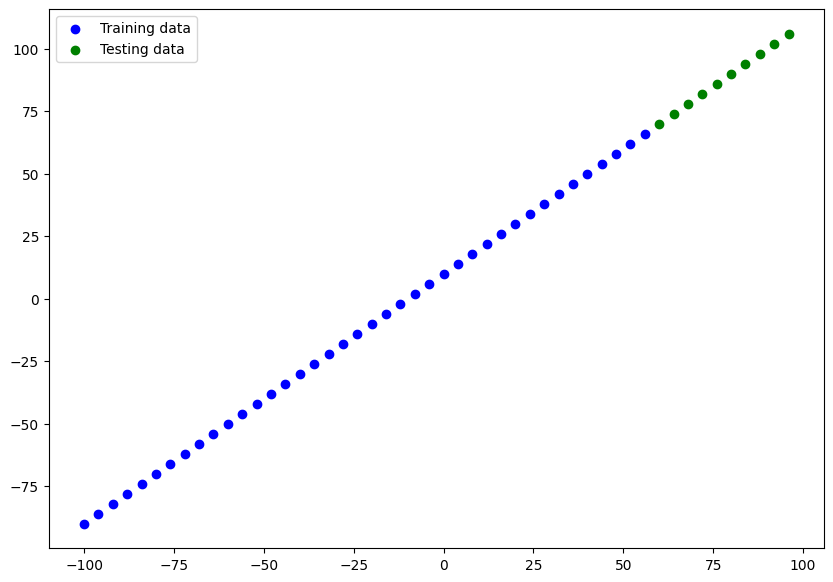

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [23]:
# Let build a model which build automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
# Create the model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.losses.mae])

In [24]:
# Visualize the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).
📖 **Resouce** For a more in-depth overview of the trainable parameters within a layer, check out MIT's 6.S191: Introduction to Deep Learning [video](https://youtu.be/aircAruvnKk) (around 18:00 - 26:00).
⚒ **Exercise:** Try playing around with the number of hidden units in the Dense layer, see how that affects the number of trainable parameters (total and trainable) by calling `model.summary()`.

In [25]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


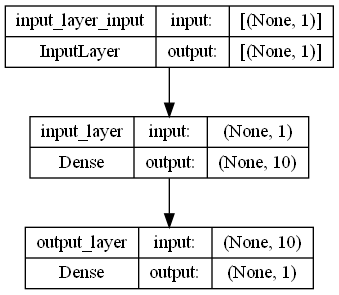

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="model.png")

In [27]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 49.2050 - mean_absolute_error: 49.2050
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 43.1106 - mean_absolute_error: 43.1106
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 37.3907 - mean_absolute_error: 37.3907
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 31.6805 - mean_absolute_error: 31.6805
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 26.2604 - mean_absolute_error: 26.2604
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 21.0076 - mean_absolute_error: 21.0076
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9863 - mean_absolute_error: 15.9863
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1674 - mean_absolute_error: 11.1674
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 8.0757 - mean_absolute_error: 8.0757
Epoch 10/100

## Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test` or `y_true` vs. `y_pred` (ground truth vs. your model's predictions).

In [28]:
# Make some predictions
y_pred = model.predict(X_test)
y_test, y_pred

1/1 [==============================] - 0s 43ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([[ 69.55194 ],
        [ 73.53358 ],
        [ 77.51521 ],
        [ 81.49685 ],
        [ 85.478485],
        [ 89.460106],
        [ 93.44174 ],
        [ 97.423386],
        [101.405014],
        [105.38665 ]], dtype=float32))

🔑 **Note:** If you fell like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [29]:
# Let's create a plotting function
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

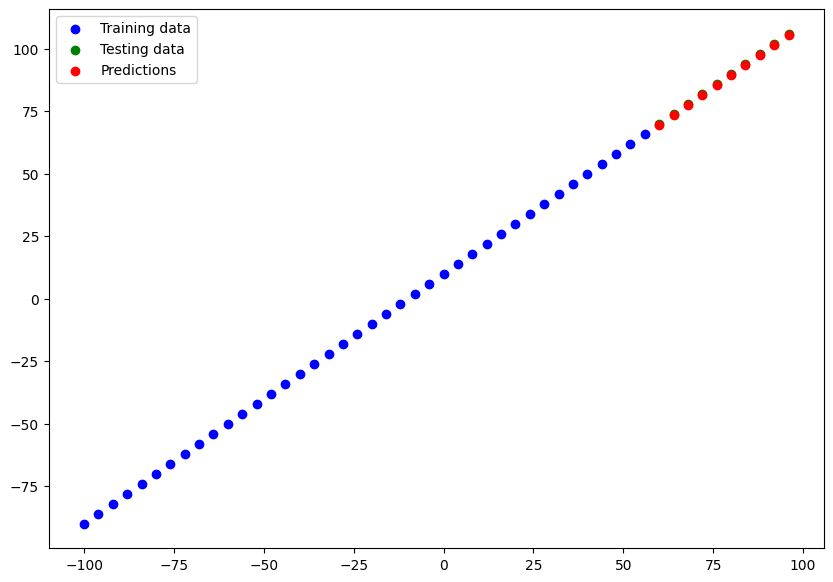

In [30]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* **MAE** - mean absolute error, a measure of how wrong each of your model's predictions are on average.
* **MSE** - mean squared error, a measure of how wrong each of your model's predictions are squared on average (more popular than MAE).

In [31]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 0.5307 - mean_absolute_error: 0.5307


[0.5307037234306335, 0.5307037234306335]

In [32]:
y_pred, y_test

(array([[ 69.55194 ],
        [ 73.53358 ],
        [ 77.51521 ],
        [ 81.49685 ],
        [ 85.478485],
        [ 89.460106],
        [ 93.44174 ],
        [ 97.423386],
        [101.405014],
        [105.38665 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [33]:
# reshape y_pred to the same shape and same type as y_test
tf.reshape(y_pred, shape=(10,)) , tf.cast(y_test, dtype=tf.float32)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.55194 ,  73.53358 ,  77.51521 ,  81.49685 ,  85.478485,
         89.460106,  93.44174 ,  97.423386, 101.405014, 105.38665 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [34]:
# Squeeze is used to remove the extra dimension into a 1D array
tf.squeeze(y_pred), tf.cast(y_test, dtype=tf.float32)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.55194 ,  73.53358 ,  77.51521 ,  81.49685 ,  85.478485,
         89.460106,  93.44174 ,  97.423386, 101.405014, 105.38665 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [35]:
#　Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=tf.cast(y_test, dtype=tf.float32),
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5307037>

In [36]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=tf.cast(y_test, dtype=tf.float32),
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.28442925>

In [37]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### Building `model_1`

In [38]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
], name="model_1")

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 99.2960 - mae: 99.2960
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 63.8405 - mae: 63.8405
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 26.6797 - mae: 26.6797
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2350 - mae: 11.2350
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 12.4528 - mae: 12.4528
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.6383 - mae: 9.6383
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.7482 - mae: 8.7482
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0868 - mae: 9.0868
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.1428 - mae: 19.1428
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.3524 - mae: 10.3524
Epoch 11/100
2/2 [==============================] - 0s 3ms/step -

1/1 [==============================] - 0s 39ms/step


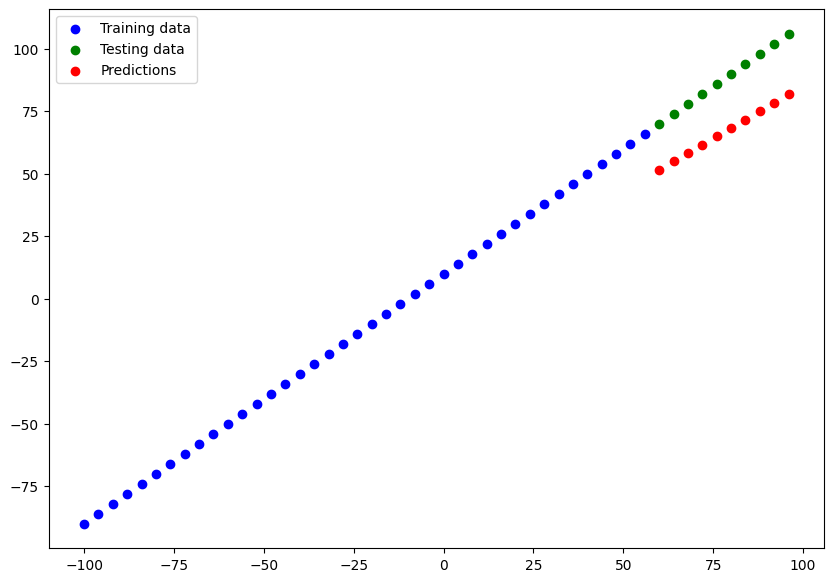

In [39]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_1)

In [40]:
# Evaluate model_1
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.354925>,
 <tf.Tensor: shape=(), dtype=float32, numpy=459.49652>)

In [41]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, name="hidden_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 46.6536 - mae: 46.6536
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 34.3198 - mae: 34.3198
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 30.4077 - mae: 30.4077
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 16.3017 - mae: 16.3017
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 22.1947 - mae: 22.1947
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.6058 - mae: 11.6058
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.7071 - mae: 12.7071
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1225 - mae: 11.1225
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.2735 - mae: 40.2735
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.6915 - mae: 27.6915
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 52ms/step
Model_2 MAE: 13.165124893188477, Model_2 MSE: 183.29515075683594


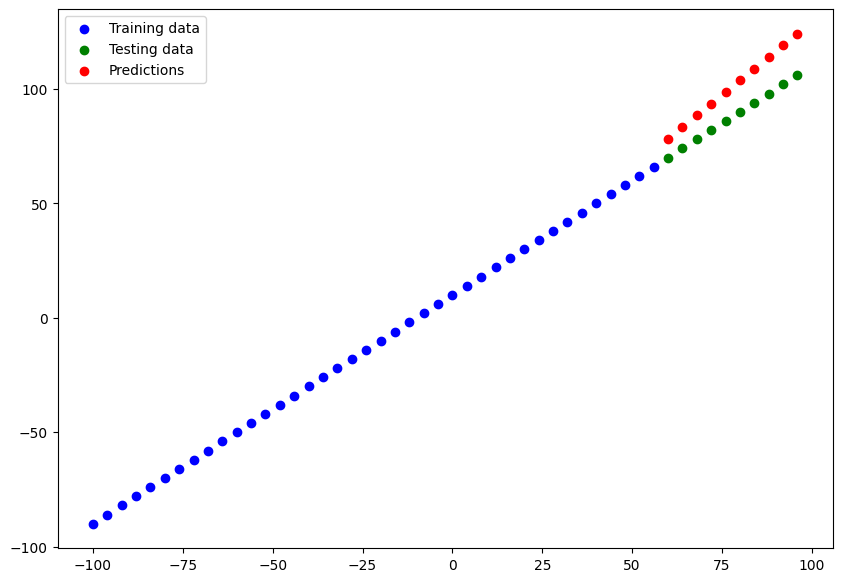

In [42]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
print(
    f"Model_2 MAE: {mae(y_test, y_pred_2).numpy()}, Model_2 MSE: {mse(y_test, y_pred_2).numpy()}"
)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_2)

In [43]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, name="hidden_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 39.2416 - mae: 39.2416
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 30.4707 - mae: 30.4707
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 35.9719 - mae: 35.9719
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 25.2685 - mae: 25.2685
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9486 - mae: 14.9486
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.8953 - mae: 11.8953
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2304 - mae: 11.2304
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1289 - mae: 11.1289
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 40.7997 - mae: 40.7997
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 28.1510 - mae: 28.1510
Epoch 11/500
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 47ms/step
Model_3 MAE: 68.64637756347656, Model_3 MSE: 4798.9111328125


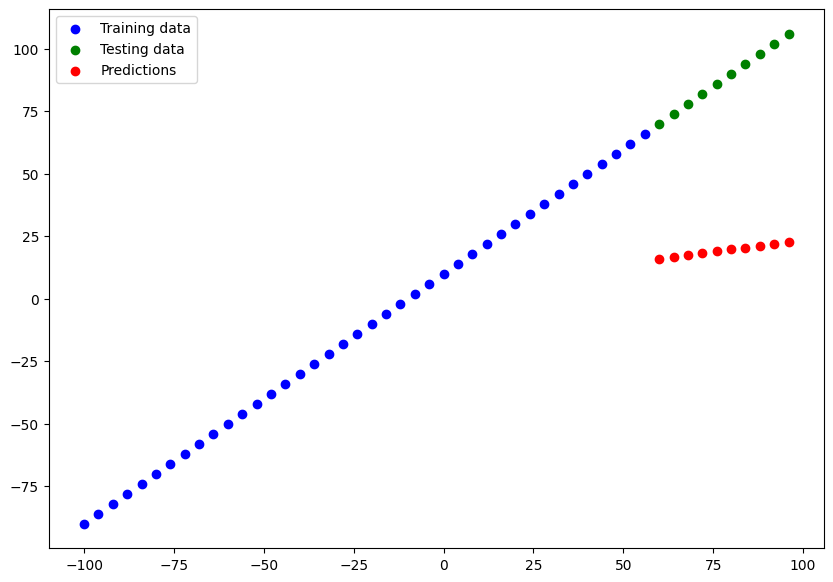

In [44]:
# Make and plot predictions for model_3
y_pred_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
print(
    f"Model_3 MAE: {mae(y_test, y_pred_3).numpy()}, Model_3 MSE: {mse(y_test, y_pred_3).numpy()}"
)
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_3)

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.